In [1]:
from qiskit import  assemble 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer,  BasicAer
from qiskit.visualization import plot_histogram

/Users/venkateshkalakkad/opt/anaconda3/envs/QCprojects/lib/python3.6/site-packages/qiskit/__init__.py:66: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of qiskit-terra 0.17.0. Support for running Qiskit with Python 3.6 will be removed in qiskit-terra 0.20.0.
  DeprecationWarning,


In [2]:
def pseudo_random(numqbits ):
    Ranreg = QuantumRegister(numqbits,name='ran')
    Ranclas= ClassicalRegister(numqbits, name='cran')
    qc = QuantumCircuit(Ranreg,Ranclas)
    qc.reset(Ranreg)
    qc.h(Ranreg)  #superposition. This places qubits in superposition state
    qc.measure(Ranreg,Ranclas) #quantum collapse
    sim =  Aer.get_backend('aer_simulator' )
    counts = sim.run(qc).result().get_counts()
    value = max(counts,key=lambda x: counts[x])
    return value,counts,qc

In [3]:

RandomNo,counts,qc = pseudo_random(3)
qc.draw()
#returns value with highest frequency


┌───┐┌─┐      
 ran_0: ─|0>─┤ H ├┤M├──────
             ├───┤└╥┘┌─┐   
 ran_1: ─|0>─┤ H ├─╫─┤M├───
             ├───┤ ║ └╥┘┌─┐
 ran_2: ─|0>─┤ H ├─╫──╫─┤M├
             └───┘ ║  ║ └╥┘
cran: 3/═══════════╩══╩══╩═
                   0  1  2

In [4]:
RandomNumber= int(RandomNo,2)
print ("Random Number is : ", RandomNumber)

Random Number is :  5


In [5]:
  #just to verify the result. The number above has highest probability
all_values = counts.values()
max_value = max(all_values) 
print(max_value/sum(all_values)*100," is the probability for random number:", RandomNumber)

13.671875  is the probability for random number: 5


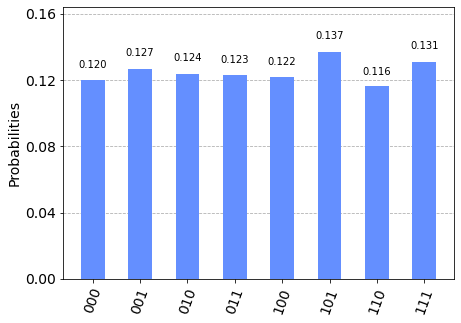

In [6]:
plot_histogram(counts) # Check if highest prob matches for random number above!